### Kaggle - Web Traffic Time Series Forecasting

## Model 04 - Neural Network v4 - Weekday and Month - Scale only

by Louis Yang

Same model as "model_4_neural_network_3_weekday_month" but only scale not shift when doing normalization

In [2]:
model_name = 'model_04_neural_network_4_scale'

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

## Input

In [4]:
print('%%% Reading data train_1.csv ... ', end = '', flush = True)
input_df = pd.read_csv("../data/train_1.csv")
print('done!')

%%% Reading data train_1.csv ... done!


In [5]:
input_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [6]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


## Processing Data
Generate training set and test (predict) set

### Day of week alignment

In [7]:
from datetime import datetime
def weekday(datestr):
    return datetime.strptime(datestr,'%Y-%m-%d').weekday()
def daydiff(dstr1,dstr2):
    return datetime.strptime(dstr1,'%Y-%m-%d') - datetime.strptime(dstr2,'%Y-%m-%d') 

We need to predict output (Y_output_pred) start from Sunday (6) for data set 1. (0: Monday, 6: Sunday)

In [8]:
# We take the x_length + y_length days of data only
# This part then split into x_length as input X and y_length as output Y
x_length = 63  # input period
y_length = 63  # predict period

In [9]:
X_input_first_day = input_df.columns[-x_length-364]
X_input_final_day = input_df.columns[-1-364]
X_input_first_day, X_input_final_day

('2015-11-01', '2016-01-02')

In [10]:
daydiff(X_input_first_day, X_input_final_day)

datetime.timedelta(-62)

In [11]:
X_output_first_day = input_df.columns[-x_length]
X_output_final_day = input_df.columns[-1]
X_output_first_day, X_output_final_day

('2016-10-30', '2016-12-31')

In [12]:
daydiff(X_output_first_day, X_output_final_day)

datetime.timedelta(-62)

In [13]:
weekday(X_input_first_day), weekday(X_output_first_day)

(6, 6)

Both are Wednesday (2).

In [14]:
Y_output_first_day = '2017-01-01'; Y_output_final_day = '2017-03-01'
daydiff(Y_output_first_day,Y_output_final_day)

datetime.timedelta(-59)

In [15]:
Y_input_first_day = input_df.columns[-364]
Y_input_final_day = input_df.columns[-1-364+y_length]
Y_input_first_day, Y_input_final_day

('2016-01-03', '2016-03-05')

In [16]:
daydiff(Y_input_first_day, Y_input_final_day)

datetime.timedelta(-62)

In [17]:
weekday(Y_input_first_day), weekday(Y_output_first_day)

(6, 6)

Both are Sunday (6).

### Data range reduce
Select x_length + y_length days of data as training set

where x_length = 60, y_length = 60 by default for training set 1.

input_df = input_df[['Page']+list(input_df.columns[-x_length-y_length-day_shift:])]

input_df

input_df.info()

In [18]:
X_input_first_day, Y_input_final_day

('2015-11-01', '2016-03-05')

input_data contains X_input and Y_input array

In [19]:
input_date_range = input_df.columns[-x_length-364:-364+y_length]; input_date_range

Index(['2015-11-01', '2015-11-02', '2015-11-03', '2015-11-04', '2015-11-05',
       '2015-11-06', '2015-11-07', '2015-11-08', '2015-11-09', '2015-11-10',
       ...
       '2016-02-25', '2016-02-26', '2016-02-27', '2016-02-28', '2016-02-29',
       '2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05'],
      dtype='object', length=126)

In [20]:
input_data = input_df[input_date_range].values; input_data

array([[ 24.,   6.,   6., ...,  15.,   5.,  21.],
       [ 11.,  14.,  14., ...,  26.,  16.,  16.],
       [  6.,   2.,   5., ...,   1.,   4.,   7.],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [21]:
input_data_num = np.nan_to_num(input_data); input_data_num

array([[ 24.,   6.,   6., ...,  15.,   5.,  21.],
       [ 11.,  14.,  14., ...,  26.,  16.,  16.],
       [  6.,   2.,   5., ...,   1.,   4.,   7.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [22]:
input_data_num.shape

(145063, 126)

In [23]:
X_output_first_day, X_output_final_day

('2016-10-30', '2016-12-31')

output_data contains only X_output

In [24]:
output_date_range = input_df.columns[-x_length:]; output_date_range

Index(['2016-10-30', '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03',
       '2016-11-04', '2016-11-05', '2016-11-06', '2016-11-07', '2016-11-08',
       '2016-11-09', '2016-11-10', '2016-11-11', '2016-11-12', '2016-11-13',
       '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18',
       '2016-11-19', '2016-11-20', '2016-11-21', '2016-11-22', '2016-11-23',
       '2016-11-24', '2016-11-25', '2016-11-26', '2016-11-27', '2016-11-28',
       '2016-11-29', '2016-11-30', '2016-12-01', '2016-12-02', '2016-12-03',
       '2016-12-04', '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08',
       '2016-12-09', '2016-12-10', '2016-12-11', '2016-12-12', '2016-12-13',
       '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-17', '2016-12-18',
       '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
       '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
       '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object')

In [25]:
output_data = input_df[output_date_range].values; output_data

array([[ 50.,  16.,  30., ...,  19.,  18.,  20.],
       [ 15.,  24.,  13., ...,  45.,  26.,  20.],
       [  2.,   6.,   1., ...,   3.,   4.,  17.],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [26]:
output_data_num = np.nan_to_num(output_data); output_data_num

array([[ 50.,  16.,  30., ...,  19.,  18.,  20.],
       [ 15.,  24.,  13., ...,  45.,  26.,  20.],
       [  2.,   6.,   1., ...,   3.,   4.,  17.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [27]:
output_data_num.shape

(145063, 63)

### View

In [28]:
def view(x, xlim=None, ylim=None, yscale='linear'):
    plt.yscale(yscale)
    plt.plot(x)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.show()
def examine(X, view_n=5):
    '''randomly show some example in feature and label'''
    n_X = len(X)
    view_list = np.random.choice(n_X, min(view_n, n_X), replace=False)
    for i in view_list:
        view(X[i])
        print('i = ',i)

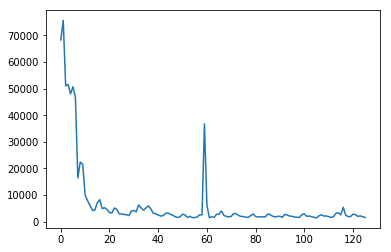

i =  8700


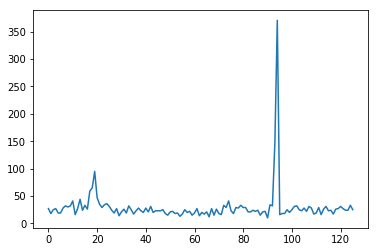

i =  126316


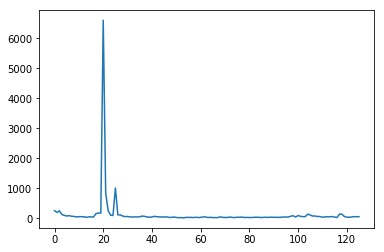

i =  23649


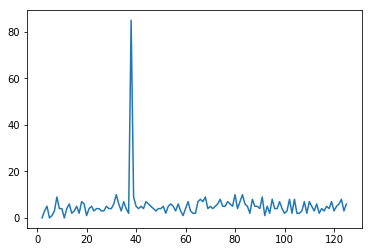

i =  84484


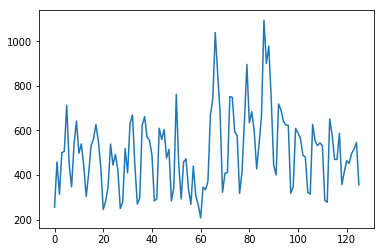

i =  89008


In [29]:
examine(input_data)

### Log

In [30]:
def log(X):
    return np.log10(X + 1.0)
def unlog(X):
    return np.clip(np.power(10., X) - 1.0, 0.0, None)

In [31]:
input_data_log = log(input_data_num); input_data_log

array([[ 1.39794001,  0.84509804,  0.84509804, ...,  1.20411998,
         0.77815125,  1.34242268],
       [ 1.07918125,  1.17609126,  1.17609126, ...,  1.43136376,
         1.23044892,  1.23044892],
       [ 0.84509804,  0.47712125,  0.77815125, ...,  0.30103   ,
         0.69897   ,  0.90308999],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
input_data_log.shape, input_data.shape

((145063, 126), (145063, 126))

In [33]:
output_data_log = log(output_data_num); output_data_log

array([[ 1.70757018,  1.23044892,  1.49136169, ...,  1.30103   ,
         1.2787536 ,  1.32221929],
       [ 1.20411998,  1.39794001,  1.14612804, ...,  1.66275783,
         1.43136376,  1.32221929],
       [ 0.47712125,  0.84509804,  0.30103   , ...,  0.60205999,
         0.69897   ,  1.25527251],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
output_data_log.shape, output_data.shape

((145063, 63), (145063, 63))

In [35]:
# Check inverse log transformation
input_data_log_tt = unlog(input_data_log)
input_data_log_tt_dif = input_data_log_tt - input_data_num
input_data_log_tt_dif.min(), input_data_log_tt_dif.max()

(-1.862645149230957e-08, 1.862645149230957e-08)

In [36]:
# Check inverse log transformation
output_data_log_tt = unlog(output_data_log)
output_data_log_tt_dif = output_data_log_tt - output_data_num
output_data_log_tt_dif.min(), output_data_log_tt_dif.max()

(-2.6077032089233398e-08, 2.6077032089233398e-08)

### Normalization (Shift and Scale)

In [38]:
#input_center = np.nanmedian(input_data_log, axis=-1).reshape(-1,1)
input_center = 0.0
input_center  # remember sample-wised center

0.0

In [40]:
#input_scale = np.nanstd(input_data_log, axis=-1).reshape(-1,1)
input_scale = 2.0 * np.nanmedian(input_data_log, axis=-1).reshape(-1,1)
input_scale[input_scale == 0.0] = 1.0  # Prevent divid by zero
input_scale  # remember sample-wised scale

array([[ 2.4345689 ],
       [ 2.35218252],
       [ 1.20411998],
       ..., 
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [41]:
#output_center = np.nanmedian(output_data_log, axis=-1).reshape(-1,1)
output_center = 0.0
output_center  # remember sample-wised center

0.0

In [42]:
#output_scale = np.nanstd(output_data_log, axis=-1).reshape(-1,1)
output_scale = 2.0 * np.nanmedian(output_data_log, axis=-1).reshape(-1,1)
output_scale[output_scale == 0.0] = 1.0  # Prevent divid by zero
output_scale  # remember sample-wised scale

array([[ 2.5575072 ],
       [ 2.5575072 ],
       [ 1.39794001],
       ..., 
       [ 1.        ],
       [ 1.        ],
       [ 1.        ]])

In [43]:
# Check if there is any 0. in input_scale
[i for i in range(len(input_scale)) if input_scale[i] == 0.]

[]

In [44]:
def transform(data_ori, center, scale):
    return (data_ori - center) / scale
def untransform(data, center, scale):
    return data * scale + center

In [45]:
# Normalize the input_data and output_data
input_data_norm = transform(input_data_log, input_center, input_scale)
output_data_norm = transform(output_data_log, output_center, output_scale)

In [46]:
def check_nan(X):
    return [x for x in X if np.isnan(x).any()]

In [47]:
check_nan(input_data_norm), check_nan(output_data_norm)  # Check if there is any nan in the input_data

([], [])

### Remove the all-nan data

In [ ]:
# Not implement yet

### Make (X,Y) pairs data from data set

In [48]:
day_shift = 0

In [49]:
def make_XY(data, x_length=x_length, y_length=y_length, shift=day_shift):
    if shift == 0:
        return data[:, -x_length-y_length:-y_length], data[:, -y_length:]
    else:
        return data[:, -x_length-y_length-shift:-y_length-shift], data[:, -y_length-shift:-shift]

In [50]:
X_input, Y_input = make_XY(input_data_norm)
X_input.shape, Y_input.shape

((145063, 63), (145063, 63))

In [51]:
X_output = output_data_norm[:, -x_length:]
X_output.shape

(145063, 63)

### Split Data into Training and Cross Validation Sets

In [52]:
def make_shuffle_index(n, seed=None):
    shuffle_index = np.array(list(range(n)))
    np.random.seed(seed)  # you can fix the initial seed for comparison purpose
    np.random.shuffle(shuffle_index)
    return shuffle_index

In [62]:
def using(array_ori, index_list):
    #return np.array([array_ori[i] for i in index_list])
    if type(array_ori) is np.ndarray:
        return np.take(array_ori, index_list, axis=0)
    else:
        return array_ori        

In [54]:
# Generate a shuffle list
shuffle_index = make_shuffle_index(len(X_input), seed=123)

Keep 10% of input data as validation set

In [55]:
# Split the index list into training and validation sets
n_val = int(len(X_input) * 0.1)
val_index = shuffle_index[:n_val]
train_index = shuffle_index[n_val:]

In [63]:
# Split the data sets according to the index list
X_train = using(X_input, train_index)
Y_train = using(Y_input, train_index)
X_val = using(X_input, val_index)
Y_val = using(Y_input, val_index)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((130557, 63), (130557, 63), (14506, 63), (14506, 63))

#### Split the untransformed data
Split the untransformed data in the same way for score estimation

In [64]:
train_data_num = using(input_data_num, train_index)
val_data_num = using(input_data_num, val_index)

In [65]:
X_train_ori, Y_train_ori = make_XY(train_data_num)
X_val_ori, Y_val_ori = make_XY(val_data_num)
X_train_ori.shape, Y_train_ori.shape, X_val_ori.shape, Y_val_ori.shape

((130557, 63), (130557, 63), (14506, 63), (14506, 63))

In [67]:
train_center = using(input_center, train_index)
val_center = using(input_center, val_index)
train_scale = using(input_scale, train_index)
val_scale = using(input_scale, val_index)
if type(train_center) is np.ndarray:
    train_center.shape, val_center.shape, train_scale.shape, val_scale.shape

In [68]:
train_scale.shape, val_scale.shape

((130557, 1), (14506, 1))

#### Check if the inverse transformation is correct

In [69]:
# Undo transformation
X_train_tt = unlog(untransform(X_train, train_center, train_scale))

In [70]:
X_train_tt_diff = X_train_tt - X_train_ori
X_train_tt_diff.min(), X_train_tt_diff.max()

(-5.5879354476928711e-08, 5.9604644775390625e-08)

#### Examine

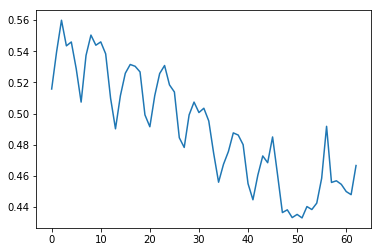

i =  75473


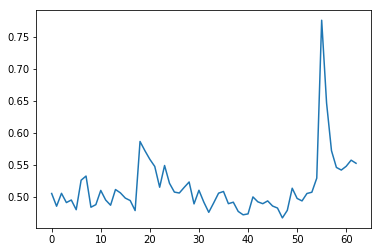

i =  114750


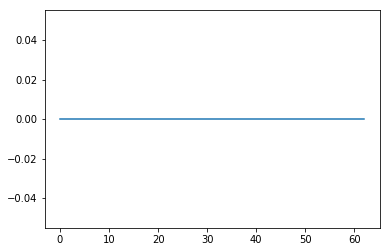

i =  94665


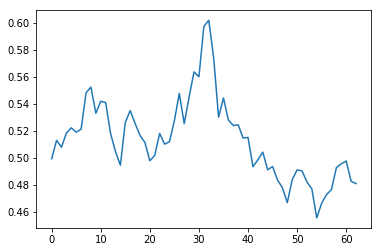

i =  25064


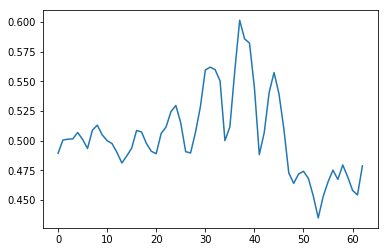

i =  74505


In [106]:
examine(X_train)

## Neural Network?

In [71]:
from keras.models import Sequential
#from keras.layers import Conv1D
from keras.layers import Dense, Dropout, Flatten
from keras.losses import mean_squared_error
from keras.optimizers import Adam

Using TensorFlow backend.


### SMAPE
Symmetric mean absolute percentage error

https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

In [72]:
import keras.backend as K

def k_smape(y_true, y_pred):
    '''Symmetric mean absolute percentage error for keras metric'''
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true) + K.abs(y_pred),
                                            K.epsilon(),
                                            None))
    return 200. * K.mean(diff, axis=-1)

In [73]:
def smape(y_true, y_pred, axis=None):
    '''Symmetric mean absolute percentage error'''
    diff = np.abs((y_true - y_pred) / 
                  np.clip(np.abs(y_true) + np.abs(y_pred), K.epsilon(),
                          None))
    return 200. * np.mean(diff, axis=axis)

In [74]:
# Benchmark SMAPE on the transformed data
smape(Y_train,X_train), smape(Y_val,X_val), smape(Y_train,Y_train)

(21.528317498409148, 21.616066245750652, 0.0)

In [75]:
# Benchmark SMAPE on the original data
smape(Y_train_ori,X_train_ori), smape(Y_val_ori,X_val_ori), \
smape(Y_train_ori,Y_train_ori)

(54.620234938051645, 54.656050128706212, 0.0)

Doing better than the first two scores are better than simply copy and past the previous result.

### Neural Network Model
Simple 4 fully connected layers with dropout

In [76]:
from keras.models import Model
from keras.layers import Input

In [77]:
layer_0 = Input(shape=(x_length,))
layer_t = Dense(120, activation='relu')(layer_0)
layer_t = Dense(120, activation='relu')(layer_t)
layer_t = Dropout(0.25)(layer_t)
layer_t = Dense(120, activation='relu')(layer_t)
layer_t = Dropout(0.5)(layer_t)
layer_f = Dense(y_length)(layer_t)

In [78]:
model = Model(inputs=layer_0, outputs=layer_f)
model.compile(optimizer='adam',
              loss='mean_squared_error', metrics=[k_smape])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 63)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               7680      
_________________________________________________________________
dense_2 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               14520     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 63)                7623      
Total para

About 5s for 1 epoch on i5-750 CPU

In [79]:
hist = model.fit(X_train, Y_train, batch_size=128, epochs=80, 
                 validation_data=(X_val, Y_val))

Train on 130557 samples, validate on 14506 samples
Epoch 1/80
130557/130557 [==============================] - 5s - loss: 0.0658 - k_smape: 38.6662 - val_loss: 0.0588 - val_k_smape: 30.7318
Epoch 2/80
130557/130557 [==============================] - 5s - loss: 0.0568 - k_smape: 32.9824 - val_loss: 0.0581 - val_k_smape: 30.5258
Epoch 3/80
130557/130557 [==============================] - 5s - loss: 0.0557 - k_smape: 32.1902 - val_loss: 0.0578 - val_k_smape: 30.4559
Epoch 4/80
130557/130557 [==============================] - 5s - loss: 0.0548 - k_smape: 31.8751 - val_loss: 0.0578 - val_k_smape: 30.4214
Epoch 5/80
130557/130557 [==============================] - 5s - loss: 0.0540 - k_smape: 31.6820 - val_loss: 0.0572 - val_k_smape: 30.3493
Epoch 6/80
130557/130557 [==============================] - 5s - loss: 0.0534 - k_smape: 31.5387 - val_loss: 0.0577 - val_k_smape: 30.3110
Epoch 7/80
130557/130557 [==============================] - 5s - loss: 0.0533 - k_smape: 31.4948 - val_loss: 0.0570

130557/130557 [==============================] - 5s - loss: 0.0497 - k_smape: 30.8137 - val_loss: 0.0555 - val_k_smape: 30.1353
Epoch 60/80
130557/130557 [==============================] - 5s - loss: 0.0497 - k_smape: 30.8352 - val_loss: 0.0554 - val_k_smape: 30.1165
Epoch 61/80
130557/130557 [==============================] - 5s - loss: 0.0496 - k_smape: 30.8341 - val_loss: 0.0555 - val_k_smape: 30.3535
Epoch 62/80
130557/130557 [==============================] - 5s - loss: 0.0498 - k_smape: 30.8248 - val_loss: 0.0555 - val_k_smape: 30.2952
Epoch 63/80
130557/130557 [==============================] - 5s - loss: 0.0498 - k_smape: 30.8376 - val_loss: 0.0555 - val_k_smape: 30.2521
Epoch 64/80
130557/130557 [==============================] - 5s - loss: 0.0498 - k_smape: 30.8148 - val_loss: 0.0555 - val_k_smape: 30.0521
Epoch 65/80
130557/130557 [==============================] - 5s - loss: 0.0497 - k_smape: 30.7603 - val_loss: 0.0561 - val_k_smape: 30.3762
Epoch 66/80
130557/130557 [=====

In [80]:
model.evaluate(X_val,Y_val)

12832/14506 [=========================>....] - ETA: 0s E

[0.055654214041128573, 30.167702831466592]

### Training History

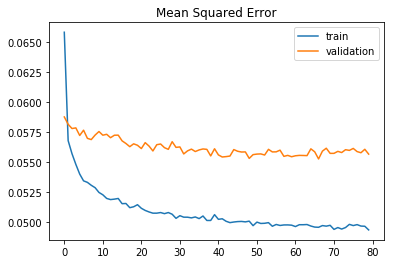

In [81]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Mean Squared Error')
plt.legend(); plt.show()

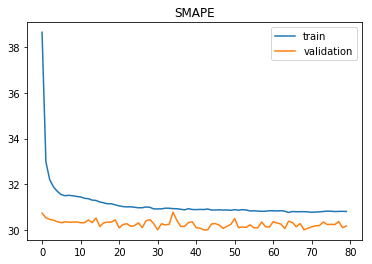

In [82]:
plt.plot(hist.history['k_smape'], label='train')
plt.plot(hist.history['val_k_smape'], label='validation')
plt.title('SMAPE')
plt.legend(); plt.show()

### Predict for Validation set

In [83]:
Y_val_pred = model.predict(X_val)

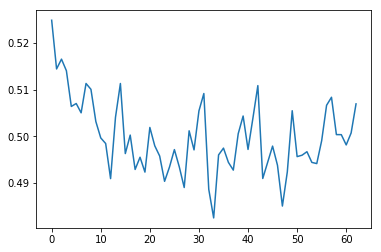

i =  2215


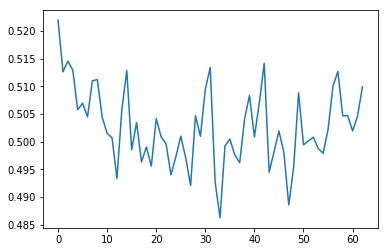

i =  1525


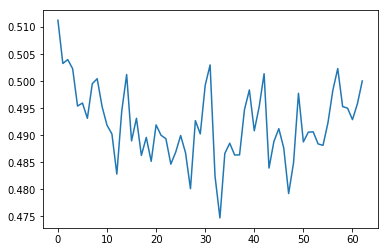

i =  3385


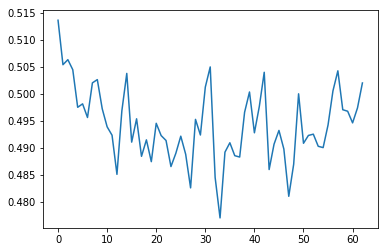

i =  5805


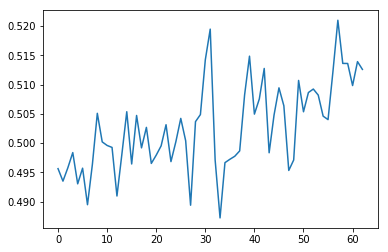

i =  5345


In [84]:
examine(Y_val_pred)

In [85]:
Y_val_pred_ori = unlog(untransform(Y_val_pred, val_center, val_scale))

In [86]:
# SMAPE of the validation set
smape(Y_val_ori, Y_val_pred_ori)

52.683713466859203

In [87]:
def view_val(i):
    i = 26
    plt.plot(Y_val_pred_ori[i])
    plt.plot(Y_val_ori[i])
    plt.plot(X_val_ori[i])
    plt.show()

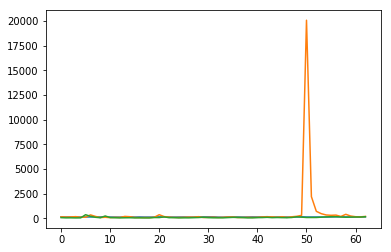

In [88]:
view_val(26)

### Predict for Output Set

In [89]:
Y_output_pred = model.predict(X_output)

In [90]:
Y_output_pred_ori = unlog(untransform(Y_output_pred, 
                                      output_center, output_scale))

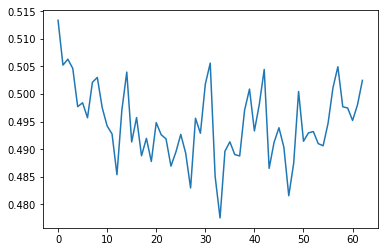

i =  133929


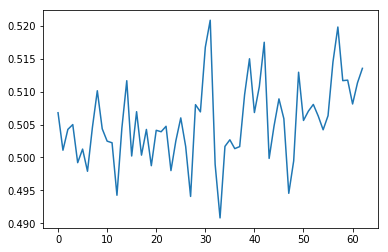

i =  134267


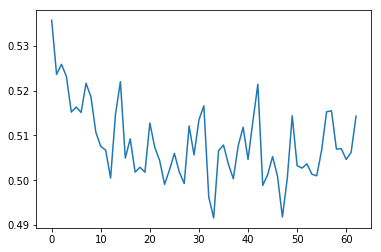

i =  108836


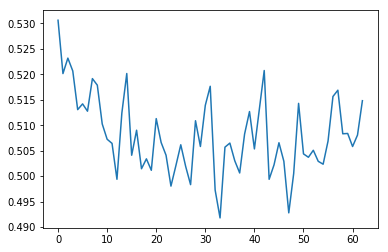

i =  47958


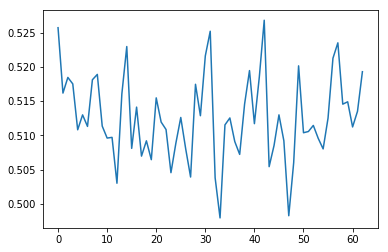

i =  9393


In [91]:
examine(Y_output_pred)

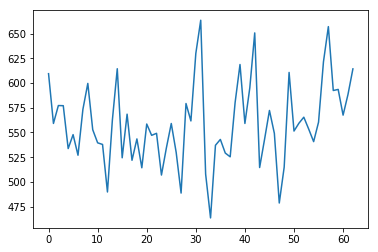

In [92]:
view(Y_output_pred_ori[28450])

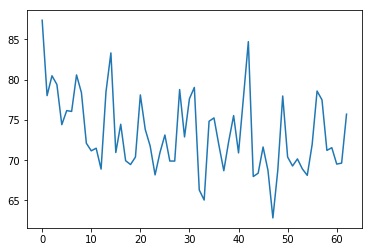

i =  62268


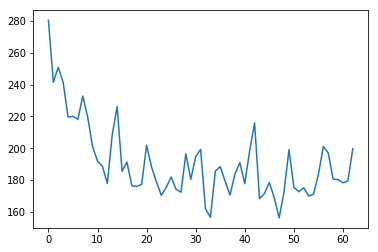

i =  118643


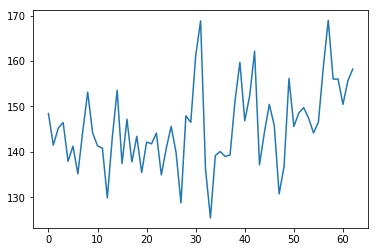

i =  30647


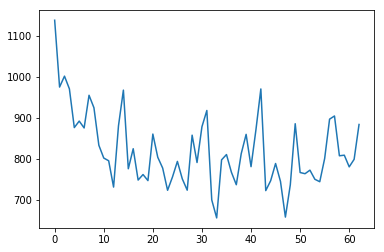

i =  29457


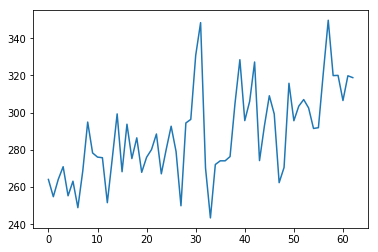

i =  18586


In [93]:
examine(Y_output_pred_ori)

## Output

In [94]:
print('%%% Reading data key_1.csv ...', end = '', flush = True)
output_df = pd.read_csv("../data/key_1.csv")
print('done!')

%%% Reading data key_1.csv ...done!


In [95]:
output_df['date'] = output_df.Page.apply(lambda a: a[-10:])  # take the last 10 characters from 'Page' as date
output_df['Page'] = output_df.Page.apply(lambda a: a[:-11])  # remove the last 10 caharacters from 'Page'
output_df['date'] = output_df['date'].astype('datetime64[ns]')  # convert 'date' string to numpy datetime format
#test['weekday'] = test.date.dt.dayofweek  # find the day of week using the 'date' column
output_df

,Page,Id,date
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05
5,!vote_en.wikipedia.org_all-access_all-agents,48f1e93517a2,2017-01-06
6,!vote_en.wikipedia.org_all-access_all-agents,5def418fcb36,2017-01-07
7,!vote_en.wikipedia.org_all-access_all-agents,77bd08134351,2017-01-08
8,!vote_en.wikipedia.org_all-access_all-agents,5889e6dbb16f,2017-01-09
9,!vote_en.wikipedia.org_all-access_all-agents,5f21fef1d764,2017-01-10


In [96]:
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703780 entries, 0 to 8703779
Data columns (total 3 columns):
Page    object
Id      object
date    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 199.2+ MB


In [97]:
output_df['date'].values[0:62]  # Make sure the range is 60 days (see if the dates resume after 60)

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', '2017-01-04T00:00:00.000000000',
       '2017-01-05T00:00:00.000000000', '2017-01-06T00:00:00.000000000',
       '2017-01-07T00:00:00.000000000', '2017-01-08T00:00:00.000000000',
       '2017-01-09T00:00:00.000000000', '2017-01-10T00:00:00.000000000',
       '2017-01-11T00:00:00.000000000', '2017-01-12T00:00:00.000000000',
       '2017-01-13T00:00:00.000000000', '2017-01-14T00:00:00.000000000',
       '2017-01-15T00:00:00.000000000', '2017-01-16T00:00:00.000000000',
       '2017-01-17T00:00:00.000000000', '2017-01-18T00:00:00.000000000',
       '2017-01-19T00:00:00.000000000', '2017-01-20T00:00:00.000000000',
       '2017-01-21T00:00:00.000000000', '2017-01-22T00:00:00.000000000',
       '2017-01-23T00:00:00.000000000', '2017-01-24T00:00:00.000000000',
       '2017-01-25T00:00:00.000000000', '2017-01-26T00:00:00.000000000',
       '2017-01-27T00:00:00.000000000', '2017-01-28

In [98]:
predict_dates_index=pd.date_range(Y_output_first_day, 
                                  periods=np.timedelta64(y_length,'D'), 
                                  freq = 'D', unit = 'D')
predict_dates_index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-14', '2017-01-15', '2017-01-16',
               '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20',
               '2017-01-21', '2017-01-22', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-28',
               '2017-01-29', '2017-01-30', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-11', '2017-02-12', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25',
      

In [99]:
result_df = pd.DataFrame(Y_output_pred_ori, columns = predict_dates_index)
result_df

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-02-23 00:00:00,2017-02-24 00:00:00,2017-02-25 00:00:00,2017-02-26 00:00:00,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00,2017-03-02 00:00:00,2017-03-03 00:00:00,2017-03-04 00:00:00
0,20.106713,18.970034,19.074799,18.774394,17.938112,17.978964,17.760729,18.468757,18.370941,17.738017,...,16.756422,16.775363,17.295297,17.980963,18.288580,17.477056,17.443611,17.246147,17.525979,18.150669
1,19.382630,18.382483,18.415889,18.166041,17.381741,17.409897,17.144654,17.830743,17.831527,17.289743,...,16.381532,16.399796,16.883850,17.476764,17.878519,17.129372,17.087685,16.900367,17.197790,17.716414
2,4.534923,4.505778,4.971424,5.112894,4.906746,5.040371,4.692328,4.630083,4.942042,4.752092,...,4.587803,4.405255,4.292187,4.607023,4.752107,4.601519,4.594368,4.669577,4.604419,4.520927
3,16.250326,15.312911,15.370498,15.169357,14.549247,14.657829,14.530485,15.097265,14.968440,14.400577,...,13.848739,13.813689,14.247149,14.862374,15.037149,14.353066,14.349439,14.125636,14.304635,14.856660
4,9.823572,9.692090,9.803556,9.921256,9.641670,9.770509,9.467576,9.819866,10.252514,9.990489,...,10.352511,10.174131,10.163822,10.601836,11.079881,10.662139,10.660909,10.454454,10.674980,10.625706
5,23.044693,21.469355,21.761588,21.285418,20.250552,20.306800,20.213838,21.021960,20.626341,19.746807,...,18.408610,18.457335,19.110985,20.045349,20.124299,19.128395,19.100280,18.896856,19.129063,20.081937
6,8.275654,8.026337,8.073457,8.051936,7.804979,7.850704,7.713094,7.970581,8.099933,7.897760,...,7.787983,7.746037,7.856887,8.118223,8.337145,8.049712,8.042054,7.931279,8.054224,8.166787
7,42.469180,41.685801,42.531825,43.401719,41.655110,42.495157,40.570562,42.803819,45.827716,44.139238,...,46.937978,45.662281,45.504246,48.530251,51.822025,48.909840,48.917201,47.503733,49.029022,48.571895
8,39.133313,36.466255,36.676961,35.912719,34.017420,34.090902,33.693079,35.275303,34.919113,33.513898,...,31.182289,31.271980,32.468401,33.968055,34.580562,32.780225,32.692089,32.289688,32.875137,34.359873
9,34.687038,31.524529,32.267667,31.558653,29.694982,29.777063,29.536312,30.825701,29.787972,28.124445,...,25.409386,25.461042,26.648504,28.274986,27.979085,26.426826,26.418401,26.173831,26.311252,28.122477


In [100]:
result_df['Page'] = input_df['Page']  # Append 'Page' column from input_df
result_df

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-02-24 00:00:00,2017-02-25 00:00:00,2017-02-26 00:00:00,2017-02-27 00:00:00,2017-02-28 00:00:00,2017-03-01 00:00:00,2017-03-02 00:00:00,2017-03-03 00:00:00,2017-03-04 00:00:00,Page
0,20.106713,18.970034,19.074799,18.774394,17.938112,17.978964,17.760729,18.468757,18.370941,17.738017,...,16.775363,17.295297,17.980963,18.288580,17.477056,17.443611,17.246147,17.525979,18.150669,2NE1_zh.wikipedia.org_all-access_spider
1,19.382630,18.382483,18.415889,18.166041,17.381741,17.409897,17.144654,17.830743,17.831527,17.289743,...,16.399796,16.883850,17.476764,17.878519,17.129372,17.087685,16.900367,17.197790,17.716414,2PM_zh.wikipedia.org_all-access_spider
2,4.534923,4.505778,4.971424,5.112894,4.906746,5.040371,4.692328,4.630083,4.942042,4.752092,...,4.405255,4.292187,4.607023,4.752107,4.601519,4.594368,4.669577,4.604419,4.520927,3C_zh.wikipedia.org_all-access_spider
3,16.250326,15.312911,15.370498,15.169357,14.549247,14.657829,14.530485,15.097265,14.968440,14.400577,...,13.813689,14.247149,14.862374,15.037149,14.353066,14.349439,14.125636,14.304635,14.856660,4minute_zh.wikipedia.org_all-access_spider
4,9.823572,9.692090,9.803556,9.921256,9.641670,9.770509,9.467576,9.819866,10.252514,9.990489,...,10.174131,10.163822,10.601836,11.079881,10.662139,10.660909,10.454454,10.674980,10.625706,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5,23.044693,21.469355,21.761588,21.285418,20.250552,20.306800,20.213838,21.021960,20.626341,19.746807,...,18.457335,19.110985,20.045349,20.124299,19.128395,19.100280,18.896856,19.129063,20.081937,5566_zh.wikipedia.org_all-access_spider
6,8.275654,8.026337,8.073457,8.051936,7.804979,7.850704,7.713094,7.970581,8.099933,7.897760,...,7.746037,7.856887,8.118223,8.337145,8.049712,8.042054,7.931279,8.054224,8.166787,91Days_zh.wikipedia.org_all-access_spider
7,42.469180,41.685801,42.531825,43.401719,41.655110,42.495157,40.570562,42.803819,45.827716,44.139238,...,45.662281,45.504246,48.530251,51.822025,48.909840,48.917201,47.503733,49.029022,48.571895,A'N'D_zh.wikipedia.org_all-access_spider
8,39.133313,36.466255,36.676961,35.912719,34.017420,34.090902,33.693079,35.275303,34.919113,33.513898,...,31.271980,32.468401,33.968055,34.580562,32.780225,32.692089,32.289688,32.875137,34.359873,AKB48_zh.wikipedia.org_all-access_spider
9,34.687038,31.524529,32.267667,31.558653,29.694982,29.777063,29.536312,30.825701,29.787972,28.124445,...,25.461042,26.648504,28.274986,27.979085,26.426826,26.418401,26.173831,26.311252,28.122477,ASCII_zh.wikipedia.org_all-access_spider


In [101]:
result_flat_df = pd.melt(result_df, id_vars='Page', var_name='date',
                         value_name='Visits')
result_flat_df

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2017-01-01,20.106713
1,2PM_zh.wikipedia.org_all-access_spider,2017-01-01,19.382630
2,3C_zh.wikipedia.org_all-access_spider,2017-01-01,4.534923
3,4minute_zh.wikipedia.org_all-access_spider,2017-01-01,16.250326
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2017-01-01,9.823572
5,5566_zh.wikipedia.org_all-access_spider,2017-01-01,23.044693
6,91Days_zh.wikipedia.org_all-access_spider,2017-01-01,8.275654
7,A'N'D_zh.wikipedia.org_all-access_spider,2017-01-01,42.469180
8,AKB48_zh.wikipedia.org_all-access_spider,2017-01-01,39.133313
9,ASCII_zh.wikipedia.org_all-access_spider,2017-01-01,34.687038


In [102]:
output_df = output_df.merge(result_flat_df, how='left')  # fill the 'Visits" from result
output_df

,Page,Id,date,Visits
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01,2.461217
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02,2.544027
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03,2.647579
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04,2.755842
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05,2.717637
5,!vote_en.wikipedia.org_all-access_all-agents,48f1e93517a2,2017-01-06,2.777324
6,!vote_en.wikipedia.org_all-access_all-agents,5def418fcb36,2017-01-07,2.662617
7,!vote_en.wikipedia.org_all-access_all-agents,77bd08134351,2017-01-08,2.763478
8,!vote_en.wikipedia.org_all-access_all-agents,5889e6dbb16f,2017-01-09,2.991854
9,!vote_en.wikipedia.org_all-access_all-agents,5f21fef1d764,2017-01-10,2.966521


In [103]:
# Check if there is null value
output_df.loc[output_df.Visits.isnull(), 'Visits']

Series([], Name: Visits, dtype: float64)

In [104]:
# output_df.loc[output_df.Visits.isnull(), 'Visits'] = 0.0  # Uncommend this line to Replace NaN with 0.0

In [105]:
print('%%% Writing result for ' + model_name + ' ...', 
      end = '', flush = True)
# Write only the 'Id' and 'Visits' to the result file
output_df[['Id','Visits']].to_csv('../results/submit_1_' + model_name
                                + '.csv', index = False)
print('done!')

%%% Writing result for model_04_neural_network_4_scale ...done!


Kaggle Score: 

46.7 [63,63] 80 epochs


## Compare

In [ ]:
Y_input_ori = input_data[:,-y_length:]
X_input_ori = input_data[:,:x_length]
X_output_ori = output_data

In [ ]:
def comp_view(x1, x2, title=None, show=True):
    plt.plot(x1)
    plt.plot(x2)
    if title: plt.title(title)
    if show: plt.show()

def comp_examine(data1, data2, view_n=10):
    n_data = len(data1)
    if not data1.shape == data2.shape: print(data1.shape, data2.shape, 'not the same length')
    view_list = np.random.choice(n_data, min(view_n, n_data), replace=False)
    for i in view_list:
        comp_view(data1[i], data2[i], title='i = ' + str(i))
    return view_list

In [ ]:
comp_view(Y_input_ori[2121], Y_output_pred_ori[2121])

In [ ]:
comp_view(X_input_ori[2121],Y_input_ori[2121])

In [ ]:
comp_view(X_output_ori[2121],Y_output_pred_ori[2121])

In [ ]:
comp_view(X_output[2121],Y_output_pred[2121])

In [ ]:
comp_examine(Y_input_ori, Y_output_pred_ori)

In [ ]:
comp_examine(X_input_ori, X_output_ori)

In [ ]:
input_df.iloc[:,-63*2:-63].values

In [ ]:
comp_examine(input_df.iloc[:,-63*2:-63].values,input_df.iloc[:,-63:].values)

#### Case 143557

In [ ]:
i = 143557

In [ ]:
comp_view(X_input[i], Y_input[i])

In [ ]:
comp_view(X_input_ori[i], Y_input_ori[i])

In [ ]:
comp_view(X_output[i], Y_output_pred[i])

In [ ]:
comp_view(X_input_ori[i], Y_input_ori[i])

In [ ]:
input_center[i], output_center[i], input_scale[i], output_scale[i]